In [77]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [78]:
df = pd.read_csv('apple.csv')
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2023-06-15 00:00:00+00:00,186.01,186.520,183.7800,183.96,65433166,186.01,186.520,183.7800,183.96,65433166,0.0,1.0
1253,AAPL,2023-06-16 00:00:00+00:00,184.92,186.990,184.2700,186.73,101256225,184.92,186.990,184.2700,186.73,101256225,0.0,1.0
1254,AAPL,2023-06-20 00:00:00+00:00,185.01,186.100,184.4100,184.41,49799092,185.01,186.100,184.4100,184.41,49799092,0.0,1.0
1255,AAPL,2023-06-21 00:00:00+00:00,183.96,185.410,182.5901,184.90,49515697,183.96,185.410,182.5901,184.90,49515697,0.0,1.0
1256,AAPL,2023-06-22 00:00:00+00:00,187.00,187.045,183.6700,183.74,51245327,187.00,187.045,183.6700,183.74,51245327,0.0,1.0


In [79]:
df1 = df.reset_index()['close']
df1.shape

(1257,)

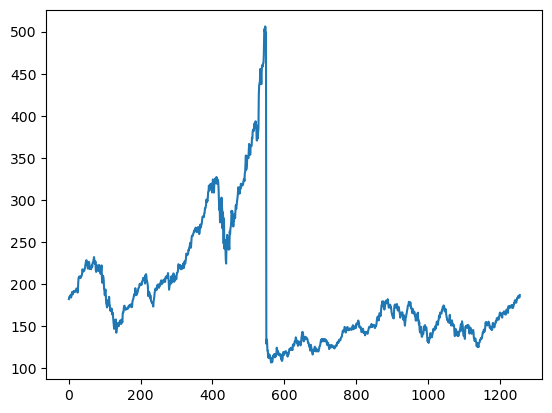

In [80]:
#displaying how the close values are distributed
plt.plot(df['close'])

In [81]:
#scaling down the values between (0,1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [82]:
#it has now transformed into an array containing values between 0 and 1
print(df1)

[[0.18867877]
 [0.19433939]
 [0.19366312]
 ...
 [0.19579211]
 [0.19316218]
 [0.20077646]]


## Preprocessing Data
### - splitting data into train and test

In [83]:
train_len = int(len(df1)*0.65)        #65% of dataset is used as training dataset
test_len = int(len(df1)-train_len)    #rest of dataset is used as testing dataset


train_data = df1[0:train_len:]
test_data = df1[train_len:len(df1):1]

In [84]:
train_len,test_len

(817, 440)

In [85]:
len(train_data),len(test_data)

(817, 440)

In [86]:
import numpy
#convert array of values into a dataset matrix
def create_dataset(dataset,time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step - 1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX),numpy.array(dataY)

In [87]:
time_step = 100
x_train,y_train = create_dataset(train_data,time_step)
x_test,y_test = create_dataset(test_data,time_step)

In [88]:
print(x_train.shape),print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [89]:
print(x_test.shape),print(y_test.shape)

(339, 100)
(339,)


(None, None)

## Creating a stacked LSTM Model

In [90]:
#reshaping the x_train and x_test data into 3-Dimension

#reshpae input to be [sample, time steps, features] which is required for LSTM

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)    #The last '1' with comma makes it 3-D
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [92]:
#Creating a stacked LSTM model

model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [93]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 5s 168ms/step - loss: 0.0425 - val_loss: 0.0024
Epoch 2/100
12/12 [==============================] - 1s 109ms/step - loss: 0.0156 - val_loss: 0.0036
Epoch 3/100
12/12 [==============================] - 1s 109ms/step - loss: 0.0107 - val_loss: 4.2034e-04
Epoch 4/100
12/12 [==============================] - 1s 107ms/step - loss: 0.0097 - val_loss: 7.8368e-04
Epoch 5/100
12/12 [==============================] - 1s 106ms/step - loss: 0.0094 - val_loss: 8.8425e-04
Epoch 6/100
12/12 [==============================] - 1s 105ms/step - loss: 0.0074 - val_loss: 0.0010
Epoch 7/100
12/12 [==============================] - 1s 108ms/step - loss: 0.0067 - val_loss: 3.7325e-04
Epoch 8/100
12/12 [==============================] - 2s 169ms/step - loss: 0.0057 - val_loss: 3.0736e-04
Epoch 9/100
12/12 [==============================] - 2s 139ms/step - loss: 0.0065 - val_loss: 3.8873e-04
Epoch 10/100
12/12 [==============================] - 1s 121ms/step

12/12 [==============================] - 2s 140ms/step - loss: 0.0015 - val_loss: 2.4297e-04
Epoch 79/100
12/12 [==============================] - 2s 133ms/step - loss: 0.0014 - val_loss: 2.3917e-04
Epoch 80/100
12/12 [==============================] - 2s 138ms/step - loss: 0.0024 - val_loss: 2.6231e-04
Epoch 81/100
12/12 [==============================] - 2s 129ms/step - loss: 0.0048 - val_loss: 2.3233e-04
Epoch 82/100
12/12 [==============================] - 2s 148ms/step - loss: 0.0025 - val_loss: 2.4464e-04
Epoch 83/100
12/12 [==============================] - 2s 136ms/step - loss: 0.0020 - val_loss: 2.4091e-04
Epoch 84/100
12/12 [==============================] - 2s 147ms/step - loss: 0.0017 - val_loss: 2.7291e-04
Epoch 85/100
12/12 [==============================] - 2s 143ms/step - loss: 0.0016 - val_loss: 2.4566e-04
Epoch 86/100
12/12 [==============================] - 2s 144ms/step - loss: 0.0015 - val_loss: 2.2247e-04
Epoch 87/100
12/12 [==============================] - 2s 14

In [95]:
#predicting and checking performance metrics

train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

11/11 [==============================] - 0s 34ms/step


In [96]:
#transform back to original form
#because the data we have scaled down needs to be get in original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [97]:
import math
from sklearn.metrics import mean_squared_error

In [98]:
#calculate RMSE performance metrics for train data

math.sqrt(mean_squared_error(y_train,train_predict))

217.83172005088875

In [99]:
#test data RMSE

math.sqrt(mean_squared_error(y_test,test_predict))

151.83884269953404

## Plotting the prediction

In [100]:
#shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, : ] = train_predict

In [101]:
#shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1 : len(df1)-1, : ] = test_predict

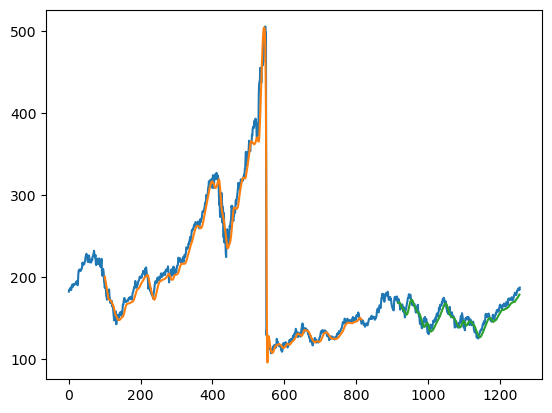

In [102]:
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [103]:
len(test_data)

440

In [104]:
#Last date of our data is 22/6. To predict for 23/6 we need to study previous 100 days data (assume)

440-100

340

In [105]:
x_input = test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [106]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.09056981840951783,
 0.0938008766437069,
 0.09665623043206006,
 0.11015654351909826,
 0.11937382592360674,
 0.1124358171571696,
 0.11974953036944269,
 0.11291170945522849,
 0.11028177833437691,
 0.1106324358171571,
 0.11774577332498432,
 0.11611772072636184,
 0.12145272385723233,
 0.11739511584220413,
 0.11448966812773947,
 0.10429555416405756,
 0.10537257357545393,
 0.10659987476518468,
 0.09986224170319347,
 0.10289292423293667,
 0.10161552911709448,
 0.09635566687539132,
 0.09785848465873509,
 0.11068252974326859,
 0.11769567939887288,
 0.11211020663744514,
 0.11529117094552283,
 0.1095804633688165,
 0.10434564809016905,
 0.10927989981214775,
 0.11458985597996241,
 0.11559173450219157,
 0.12275516593613017,
 0.1206261740763932,
 0.12663744520976827,
 0.13134627426424544,
 0.12771446462116465,
 0.13046963055729488,
 0.13377582968065116,
 0.12884157795867246,
 0.12726361928616153,
 0.13507827175954912,
 0.13906073888541015,
 0.1454226675015654,
 0.14860363180964303,
 0.1472510958046

## Prediction for next 30 days

In [107]:
lst_output = []
n_steps = 100
i = 0
while(i<30):
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape(1,n_steps,1)
        yhat = model.predict(x_input,verbose = 0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape(1,n_steps,1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1
        
print(lst_output)

[0.18225816]
101
1 day input [0.09380088 0.09665623 0.11015654 0.11937383 0.11243582 0.11974953
 0.11291171 0.11028178 0.11063244 0.11774577 0.11611772 0.12145272
 0.11739512 0.11448967 0.10429555 0.10537257 0.10659987 0.09986224
 0.10289292 0.10161553 0.09635567 0.09785848 0.11068253 0.11769568
 0.11211021 0.11529117 0.10958046 0.10434565 0.1092799  0.11458986
 0.11559173 0.12275517 0.12062617 0.12663745 0.13134627 0.12771446
 0.13046963 0.13377583 0.12884158 0.12726362 0.13507827 0.13906074
 0.14542267 0.14860363 0.1472511  0.14256731 0.14482154 0.13823419
 0.13515341 0.13340013 0.14707577 0.14619912 0.14624922 0.14935504
 0.15226049 0.14980589 0.14572323 0.14649969 0.14259236 0.14256731
 0.15421415 0.15739512 0.15716969 0.15453976 0.15180964 0.14765185
 0.16713838 0.16696306 0.16262993 0.16710081 0.16758923 0.16463369
 0.16338134 0.16338134 0.16493425 0.17084534 0.17112085 0.16871634
 0.16210394 0.16280526 0.16568566 0.17179712 0.1764809  0.17635567
 0.183469   0.18562304 0.18219161

8 day output [[0.17230172]]
9 day input [0.11063244 0.11774577 0.11611772 0.12145272 0.11739512 0.11448967
 0.10429555 0.10537257 0.10659987 0.09986224 0.10289292 0.10161553
 0.09635567 0.09785848 0.11068253 0.11769568 0.11211021 0.11529117
 0.10958046 0.10434565 0.1092799  0.11458986 0.11559173 0.12275517
 0.12062617 0.12663745 0.13134627 0.12771446 0.13046963 0.13377583
 0.12884158 0.12726362 0.13507827 0.13906074 0.14542267 0.14860363
 0.1472511  0.14256731 0.14482154 0.13823419 0.13515341 0.13340013
 0.14707577 0.14619912 0.14624922 0.14935504 0.15226049 0.14980589
 0.14572323 0.14649969 0.14259236 0.14256731 0.15421415 0.15739512
 0.15716969 0.15453976 0.15180964 0.14765185 0.16713838 0.16696306
 0.16262993 0.16710081 0.16758923 0.16463369 0.16338134 0.16338134
 0.16493425 0.17084534 0.17112085 0.16871634 0.16210394 0.16280526
 0.16568566 0.17179712 0.1764809  0.17635567 0.183469   0.18562304
 0.18219161 0.18126487 0.17778334 0.18467126 0.18564809 0.19273638
 0.19153413 0.19313713

18 day output [[0.15006101]]
19 day input [0.10289292 0.10161553 0.09635567 0.09785848 0.11068253 0.11769568
 0.11211021 0.11529117 0.10958046 0.10434565 0.1092799  0.11458986
 0.11559173 0.12275517 0.12062617 0.12663745 0.13134627 0.12771446
 0.13046963 0.13377583 0.12884158 0.12726362 0.13507827 0.13906074
 0.14542267 0.14860363 0.1472511  0.14256731 0.14482154 0.13823419
 0.13515341 0.13340013 0.14707577 0.14619912 0.14624922 0.14935504
 0.15226049 0.14980589 0.14572323 0.14649969 0.14259236 0.14256731
 0.15421415 0.15739512 0.15716969 0.15453976 0.15180964 0.14765185
 0.16713838 0.16696306 0.16262993 0.16710081 0.16758923 0.16463369
 0.16338134 0.16338134 0.16493425 0.17084534 0.17112085 0.16871634
 0.16210394 0.16280526 0.16568566 0.17179712 0.1764809  0.17635567
 0.183469   0.18562304 0.18219161 0.18126487 0.17778334 0.18467126
 0.18564809 0.19273638 0.19153413 0.19313713 0.19829681 0.19556669
 0.19579211 0.19316218 0.20077646 0.18225816 0.18280961 0.18252172
 0.18157721 0.180170

27 day output [[0.13257065]]
28 day input [0.10434565 0.1092799  0.11458986 0.11559173 0.12275517 0.12062617
 0.12663745 0.13134627 0.12771446 0.13046963 0.13377583 0.12884158
 0.12726362 0.13507827 0.13906074 0.14542267 0.14860363 0.1472511
 0.14256731 0.14482154 0.13823419 0.13515341 0.13340013 0.14707577
 0.14619912 0.14624922 0.14935504 0.15226049 0.14980589 0.14572323
 0.14649969 0.14259236 0.14256731 0.15421415 0.15739512 0.15716969
 0.15453976 0.15180964 0.14765185 0.16713838 0.16696306 0.16262993
 0.16710081 0.16758923 0.16463369 0.16338134 0.16338134 0.16493425
 0.17084534 0.17112085 0.16871634 0.16210394 0.16280526 0.16568566
 0.17179712 0.1764809  0.17635567 0.183469   0.18562304 0.18219161
 0.18126487 0.17778334 0.18467126 0.18564809 0.19273638 0.19153413
 0.19313713 0.19829681 0.19556669 0.19579211 0.19316218 0.20077646
 0.18225816 0.18280961 0.18252172 0.18157721 0.18017061 0.17845269
 0.17652696 0.17446145 0.17230172 0.17007981 0.16782004 0.16554181
 0.163261   0.1609904

In [108]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [109]:
len(df1)

1257

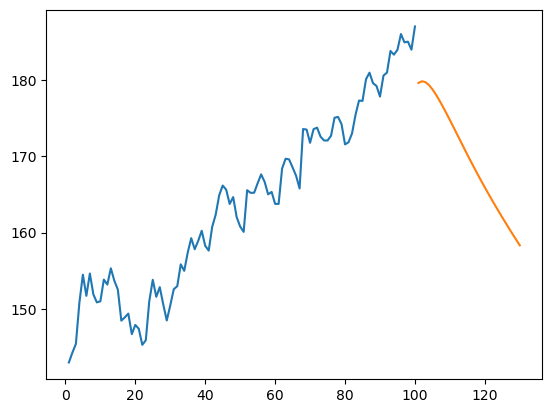

In [110]:
#1157 came from len(df1)-100   that is 1257-100 = 1157
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

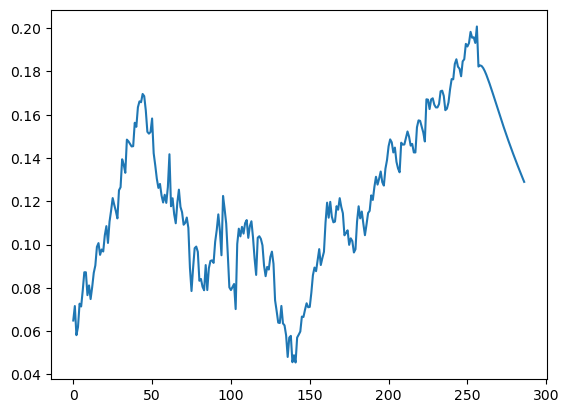

In [111]:
#combined data plotted with prediction
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])